## Assignment 1
**Linear Regression by using Deep Neural Network**: Implement Boston housing price prediction problem by linear regression using deep neural network. Use Boston House Price Prediction dataset.

In [39]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
# load the dataset
df = pd.read_csv('boston_housing_data.csv')

In [41]:
# view
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### Preprocessing

In [42]:
# check for missing values
df.isnull().any()

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX        False
RM         False
AGE         True
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
MEDV       False
dtype: bool

In [43]:
# fill missing values with mean
df = df.fillna(df.mean())
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [44]:
# separate features and target
x = df.drop('MEDV', axis=1)  # features
y = df['MEDV']  # target

In [54]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
# standardization - ensures each feature contributes equally & smoothly, leads to higher training speed & accuracy
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Build & Train DNN

In [56]:
model =  Sequential()

# input, hidden & output layer
model.add(Dense(64, input_dim = x_train.shape[1], activation='relu'))  # input_dim sets the no. of input features (columns)
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                896       
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.fit(
    x_train, y_train,
    epochs = 300,
    batch_size =  16,
    validation_split = 0.1,
    verbose = 1)

Epoch 1/300
23/23 [==============================] - 1s 10ms/step - loss: 549.1515 - mae: 21.3870 - val_loss: 496.3142 - val_mae: 20.6381
Epoch 2/300
23/23 [==============================] - 0s 3ms/step - loss: 457.9599 - mae: 19.1683 - val_loss: 382.0598 - val_mae: 17.7908
Epoch 3/300
23/23 [==============================] - 0s 3ms/step - loss: 324.6737 - mae: 15.4825 - val_loss: 230.8936 - val_mae: 13.3044
Epoch 4/300
23/23 [==============================] - 0s 3ms/step - loss: 180.4952 - mae: 10.7444 - val_loss: 106.9510 - val_mae: 8.0089
Epoch 5/300
23/23 [==============================] - 0s 3ms/step - loss: 91.3493 - mae: 7.4467 - val_loss: 58.1163 - val_mae: 5.6064
Epoch 6/300
23/23 [==============================] - 0s 3ms/step - loss: 54.5752 - mae: 5.7502 - val_loss: 39.1797 - val_mae: 4.2622
Epoch 7/300
23/23 [==============================] - 0s 3ms/step - loss: 35.8224 - mae: 4.5324 - val_loss: 33.9213 - val_mae: 4.1378
Epoch 8/300
23/23 [==============================] - 

23/23 [==============================] - 0s 3ms/step - loss: 5.0946 - mae: 1.6704 - val_loss: 18.0089 - val_mae: 3.0431
Epoch 124/300
23/23 [==============================] - 0s 3ms/step - loss: 5.2231 - mae: 1.6996 - val_loss: 16.9112 - val_mae: 3.0002
Epoch 125/300
23/23 [==============================] - 0s 3ms/step - loss: 5.1627 - mae: 1.6890 - val_loss: 18.0038 - val_mae: 3.0572
Epoch 126/300
23/23 [==============================] - 0s 3ms/step - loss: 5.0784 - mae: 1.6767 - val_loss: 17.3703 - val_mae: 2.9995
Epoch 127/300
23/23 [==============================] - 0s 3ms/step - loss: 4.9360 - mae: 1.6545 - val_loss: 17.6217 - val_mae: 3.0530
Epoch 128/300
23/23 [==============================] - 0s 3ms/step - loss: 4.9267 - mae: 1.6413 - val_loss: 16.9238 - val_mae: 2.9778
Epoch 129/300
23/23 [==============================] - 0s 3ms/step - loss: 4.8806 - mae: 1.6577 - val_loss: 17.8538 - val_mae: 3.0504
Epoch 130/300
23/23 [==============================] - 0s 3ms/step - loss: 4

23/23 [==============================] - 0s 3ms/step - loss: 2.7292 - mae: 1.1625 - val_loss: 16.4964 - val_mae: 2.9041
Epoch 246/300
23/23 [==============================] - 0s 3ms/step - loss: 2.7945 - mae: 1.2109 - val_loss: 16.2512 - val_mae: 2.8758
Epoch 247/300
23/23 [==============================] - 0s 3ms/step - loss: 2.7146 - mae: 1.1611 - val_loss: 16.6320 - val_mae: 2.9481
Epoch 248/300
23/23 [==============================] - 0s 3ms/step - loss: 2.7214 - mae: 1.1923 - val_loss: 17.3998 - val_mae: 2.9875
Epoch 249/300
23/23 [==============================] - 0s 3ms/step - loss: 2.8152 - mae: 1.2115 - val_loss: 16.6448 - val_mae: 2.8472
Epoch 250/300
23/23 [==============================] - 0s 3ms/step - loss: 2.7278 - mae: 1.1772 - val_loss: 16.5044 - val_mae: 2.8750
Epoch 251/300
23/23 [==============================] - 0s 3ms/step - loss: 2.6825 - mae: 1.1629 - val_loss: 17.0418 - val_mae: 2.9642
Epoch 252/300
23/23 [==============================] - 0s 3ms/step - loss: 2

### Evaluation & Prediction

In [58]:
test_mse, test_mae = model.evaluate(x_test, y_test, verbose = 1)
rmse = np.sqrt(test_mse)
print('MSE on test data: ', rmse)
print('MSE on test data: ', test_mse)
print('MAE on test data: ', test_mae)

4/4 [==============================] - 0s 2ms/step - loss: 13.6654 - mae: 2.5129
MSE on test data:  3.696677860991782
MSE on test data:  13.665427207946777
MAE on test data:  2.5129339694976807


In [59]:
# make predictions
y_pred = model.predict(x_test)

# compare first few predictions with actual values
print('\nPredicted vs. Actual')
for i in range(5):
    print('Predicted: ', y_pred[i][0], '| Actual: ', y_test.iloc[i])

4/4 [==============================] - 0s 2ms/step

Predicted vs. Actual
Predicted:  28.15517 | Actual:  23.6
Predicted:  35.572086 | Actual:  32.4
Predicted:  16.56255 | Actual:  13.6
Predicted:  27.254356 | Actual:  22.8
Predicted:  14.182506 | Actual:  16.1


### Plot

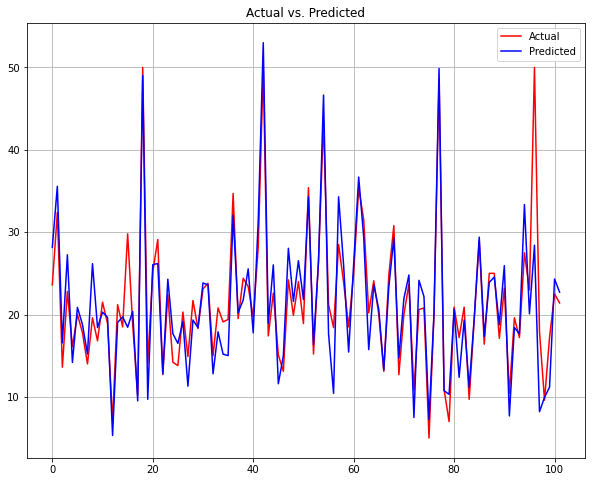

In [60]:
import matplotlib.pyplot as plt

# reshape to 2D array
y_test = np.array(y_test).reshape(-1, 1)

plt.figure(figsize=(10, 8))
plt.plot(y_test, label='Actual', color='red')
plt.plot(y_pred, label='Predicted', color='blue')
plt.title('Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()